You are provided with a Bank Marketing dataset containing customer demographic details,
campaign-related information, and economic indicators. The objective is to predict whether a
customer will subscribe to a term deposit.


##Load Dataset

In [350]:
import pandas as pd

In [351]:
data = pd.read_csv("/content/bank-additional-full.csv")

In [352]:
data.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


##Data Exploration

In [353]:
df=data.copy()

In [354]:
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [355]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [356]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# **PREPROCCESSING**

##Check for Duplicates

In [357]:
# Find duplicates
df.duplicated().sum()  # There are few duplicates

np.int64(12)

In [358]:
# Removing Duplicates
df.drop_duplicates(inplace=True)

In [359]:
# verify if duplicates are removed
df.duplicated().sum()

np.int64(0)

## Missing Value Handling

In [360]:
# Get percentage of missing values per column
df.isnull().mean()*100

,0
age,0.0
job,0.0
marital,0.0
education,0.0
default,0.0
housing,0.0
loan,0.0
contact,0.0
month,0.0
day_of_week,0.0


In [361]:
# divide numerical columns and categorical columns

num_cols = df.select_dtypes(exclude="object").columns
cat_cols = df.select_dtypes(include="object").columns

In [362]:
# importing function  SimpleImputer from lib sklearn and module impute, we can use this function to perform imputation
from sklearn.impute import SimpleImputer#imputing categorical columns with mode
cat_imputer = SimpleImputer(strategy="most_frequent")

df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

In [363]:
# Imputing numerical columns with median
num_imputer = SimpleImputer(strategy="median")

df[num_cols] = num_imputer.fit_transform(df[num_cols])

In [364]:
df.isnull().mean()*100  # verify if there are no more missing values

,0
age,0.0
job,0.0
marital,0.0
education,0.0
default,0.0
housing,0.0
loan,0.0
contact,0.0
month,0.0
day_of_week,0.0


In [365]:
ml_df = df.copy()

# Outlier Detection and Handling

In [366]:
 #divide numerical columns and categorical columns

num_cols_ml = ml_df.select_dtypes(exclude="object").columns
cat_cols_ml = ml_df.select_dtypes(include="object").columns

In [367]:
num_cols_ml

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [368]:
cat_cols_ml

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [369]:
# Outliers detection using Visualization - Box plot

import matplotlib.pyplot as plt   # importing libraries
import seaborn as sns

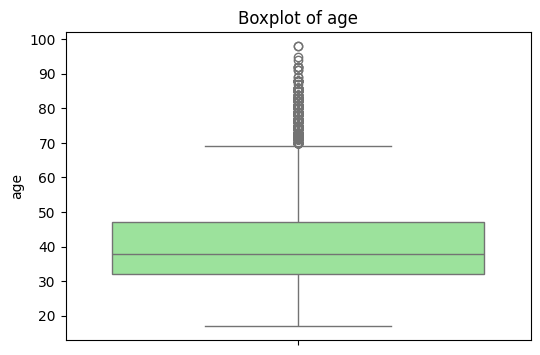

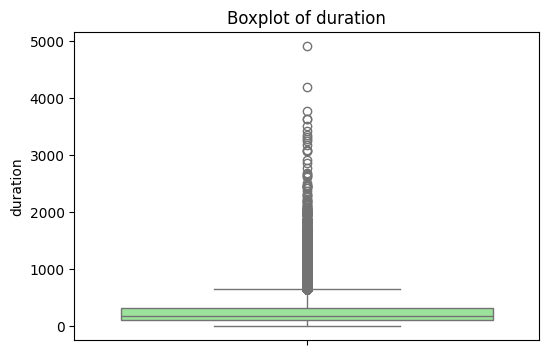

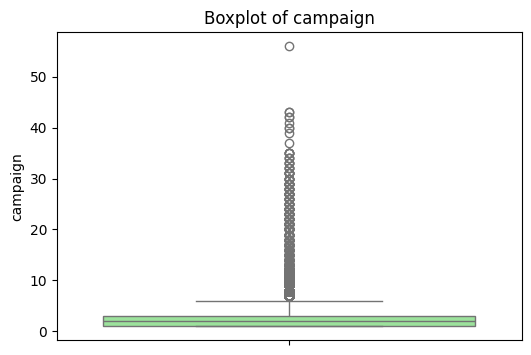

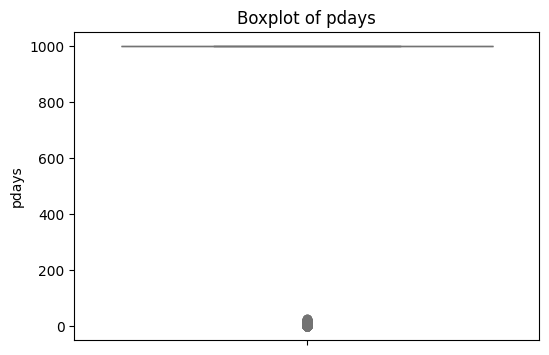

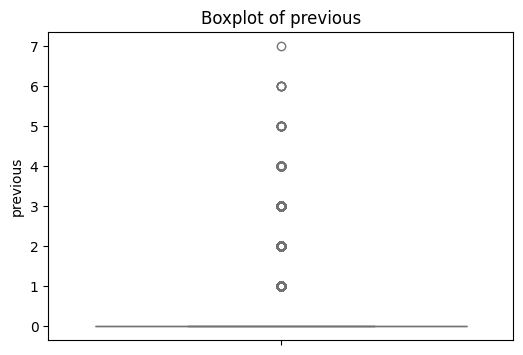

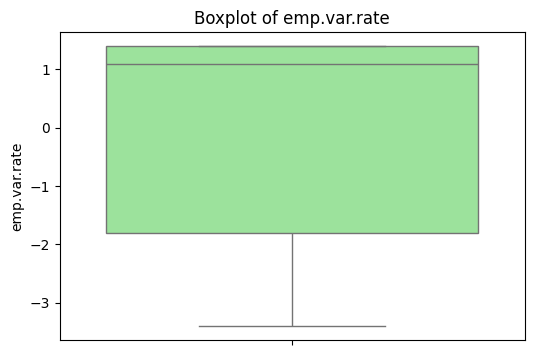

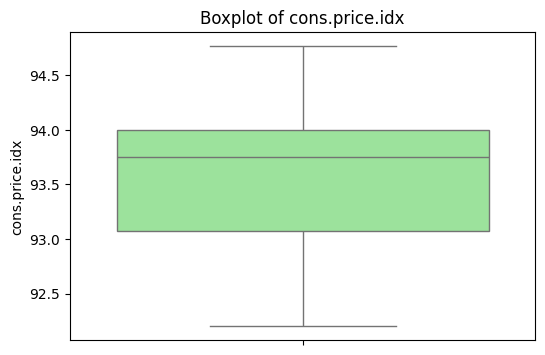

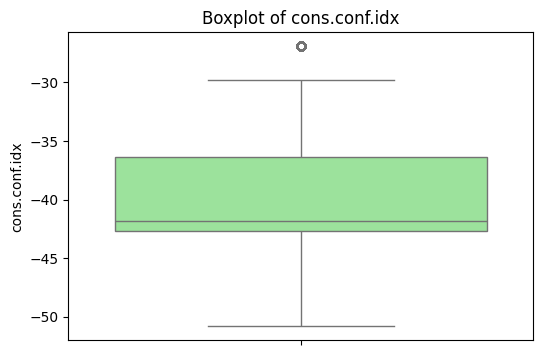

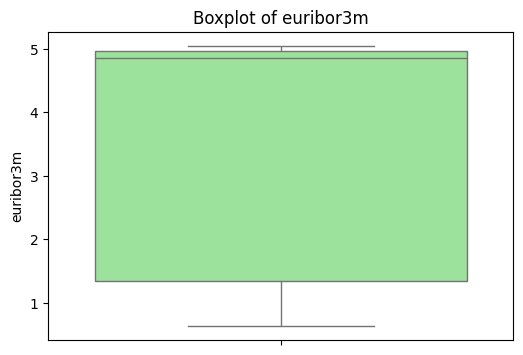

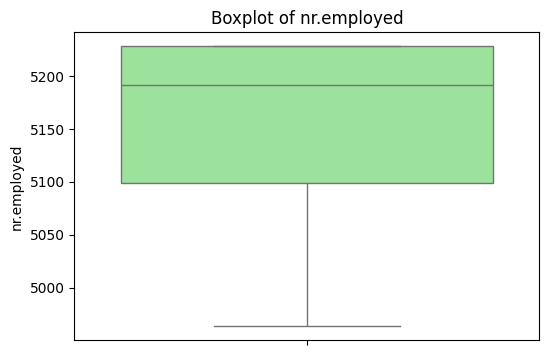

In [370]:
# Plotting box plots for Numerical columns
for col in num_cols_ml:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=ml_df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
    plt.show()

In [372]:
 # we have defined a function for capping outiers

def cap_outliers_numeric(df, numeric_cols):
    """
    Caps outliers in all numeric columns using 1.5*IQR method.
    Modifies the DataFrame in-place to avoid SettingWithCopyWarning.
    """
    for col in numeric_cols:                   #calculate IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_limit = Q1 - 1.5 * IQR          #define limits
        upper_limit = Q3 + 1.5 * IQR

        # Use .loc to modify safely
        df.loc[:, col] = df[col].clip(lower_limit, upper_limit)   #Replace values

In [373]:
# calling the above defined function

cap_outliers_numeric(ml_df, num_cols_ml)

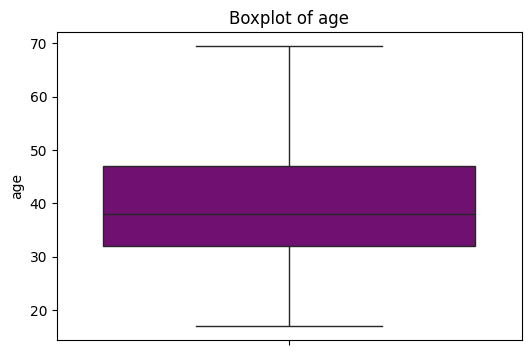

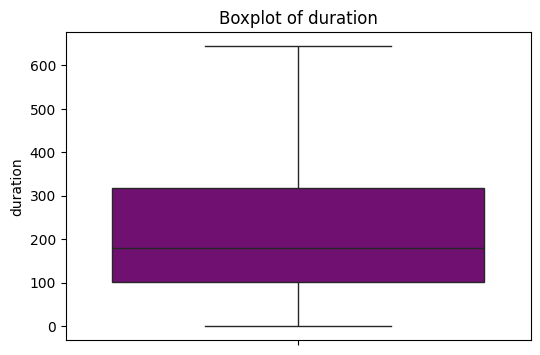

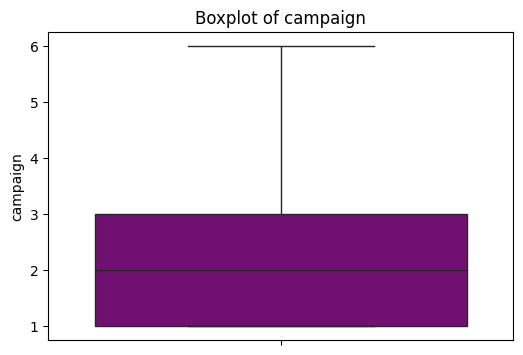

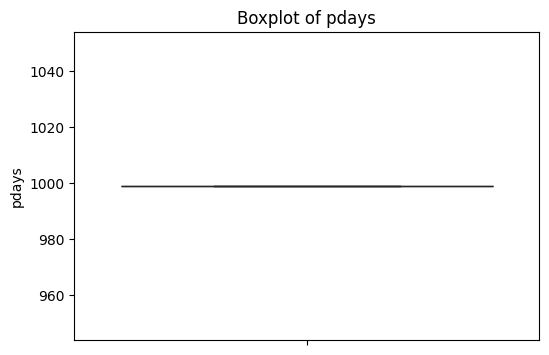

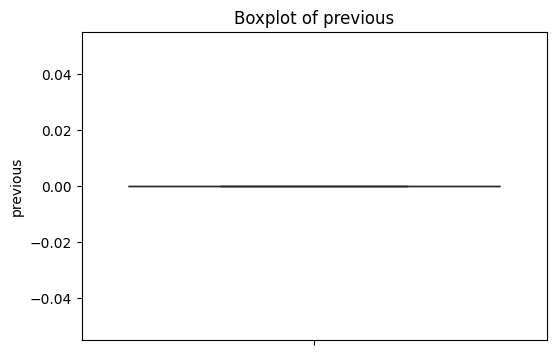

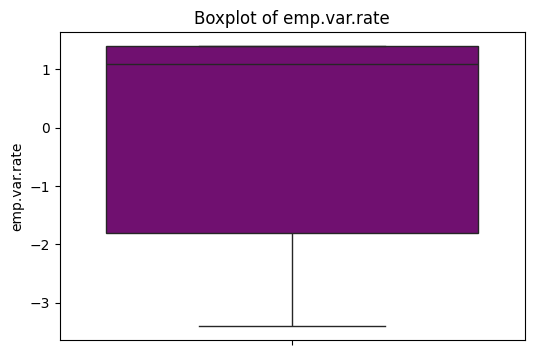

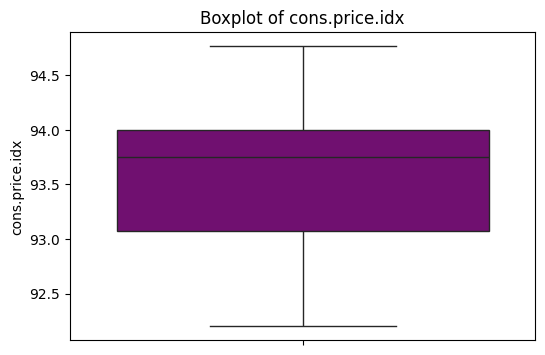

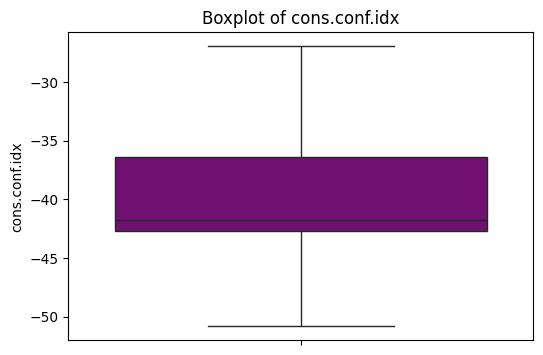

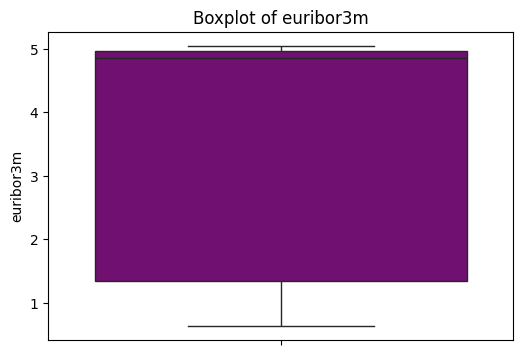

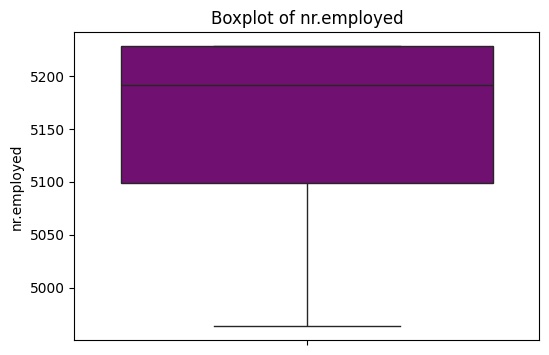

In [374]:
# verify if outliers are handled using box plots
for col in num_cols_ml:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=ml_df[col], color='purple')
    plt.title(f'Boxplot of {col}')
    plt.show()

In [376]:
# we encode categorical columns
cat_cols_ml

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

### Note : Few values are "unknown", models cannot handle "unknown" as a normal category properly without preprocessing

In [377]:
# Replacing unknown values with mode
for col in cat_cols_ml:
    ml_df[col] = ml_df[col].replace('unknown', df[col].mode()[0])

In [378]:
ml_df.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


##Encoding

#### Here target is categorical so we need to encode it. since it is yes or no , we can do binary encoding.

In [379]:
# Binary Encoding target
ml_df["y"] = ml_df["y"].map({"no": 0, "yes": 1})

In [380]:
ml_df['y'].head(5)

,y
0,0
1,0
2,0
3,0
4,0


In [381]:
#Taking columns for one hot encoding
oe_cols= [ 'marital', 'default', 'housing', 'loan', 'contact',
          'month', 'day_of_week', 'poutcome']

In [382]:
# One-Hot Encoding
ml_df = pd.get_dummies(
    ml_df,
    columns=oe_cols,
    drop_first=True, dtype=int       #drop first removes  first column alphabetically
)

In [383]:
# Target Encoding
# Encoding job
# Calculate mean y per job
mean_y_job = ml_df.groupby('job')['y'].mean()

# Map mean y back to new column
ml_df['job_enc'] = ml_df['job'].map(mean_y_job)

In [384]:
# Encoding education
# Calculate mean y per education
mean_y_ed = ml_df.groupby('education')['y'].mean()

# Map mean y back to new column
ml_df['education_enc'] = ml_df['education'].map(mean_y_ed)

In [385]:
# droping initial columns
ml_df =  ml_df.drop(columns=["education","job"], axis=1)

In [386]:
ml_df.head(2)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,job_enc,education_enc
0,56.0,261.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,1,0,0,0,1,0,0.100000,0.102490
1,57.0,149.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,1,0,0,0,1,0,0.081422,0.108389


## Scaling

In [387]:
# perform scaling using function StandardScaler from library sklearn and module preprocessing
from sklearn.preprocessing import StandardScaler

scale_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
scaler = StandardScaler()

ml_df[scale_cols] = scaler.fit_transform(ml_df[scale_cols])

In [388]:
# Final data after processing
ml_df.head(5)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,job_enc,education_enc
0,1.585672,0.146471,-0.822576,0.0,0.0,0.648101,0.722628,0.88699,0.712463,0.331695,...,0,0,1,0,0,0,1,0,0.100000,0.102490
1,1.684402,-0.485000,-0.822576,0.0,0.0,0.648101,0.722628,0.88699,0.712463,0.331695,...,0,0,1,0,0,0,1,0,0.081422,0.108389
2,-0.290190,-0.050864,-0.822576,0.0,0.0,0.648101,0.722628,0.88699,0.712463,0.331695,...,0,0,1,0,0,0,1,0,0.081422,0.108389
3,0.005999,-0.473724,-0.822576,0.0,0.0,0.648101,0.722628,0.88699,0.712463,0.331695,...,0,0,1,0,0,0,1,0,0.129128,0.082060
4,1.585672,0.405826,-0.822576,0.0,0.0,0.648101,0.722628,0.88699,0.712463,0.331695,...,0,0,1,0,0,0,1,0,0.081422,0.108389


## Split the dataset into Features and Target

In [389]:
# Features
X =ml_df.drop(columns=["y"], axis=1)

In [390]:
# Target
y =ml_df["y"]

In [391]:
# Check class distribution
y.value_counts()

,count
y,
0,36537
1,4639


<Axes: xlabel='y', ylabel='count'>

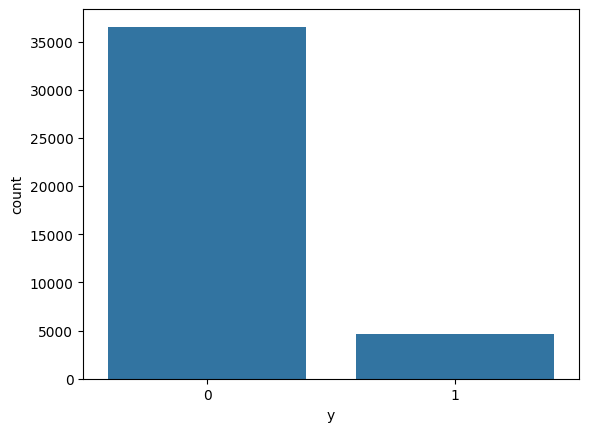

In [392]:
# Visualize distribution
sns.countplot(x=y)

In [393]:
# Find CIR ratio
y.value_counts()

maj_cls = y.value_counts().max()
min_cls = y.value_counts().min()
ratio = maj_cls / min_cls

print(f"Class Imbalance Ratio: {ratio:.2f}")


Class Imbalance Ratio: 7.88


 CIR ratio :3.0 - 10.0 (High Imbalance)

 use SMOTE or ADASYN

In [394]:
# Using SMOTE to handle imbalance
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

In [395]:
# Apply SMOTE
smote = SMOTE(sampling_strategy='auto')
X, y = smote.fit_resample(X, y)

<Axes: xlabel='y', ylabel='count'>

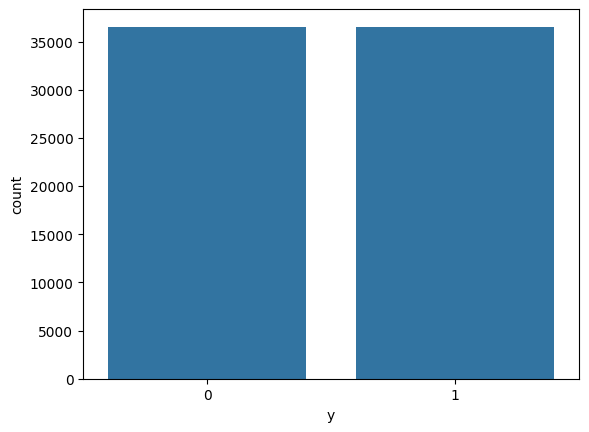

In [396]:
sns.countplot(x=y)  # After applying Smote class is balanced

## Split the dataset into training and testing sets.

In [397]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Apply Classification Models

In [398]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [399]:
# Defining function to find Accuracy score
def acc_sc(pred) :
  ''' find accuracy score'''
  accuracy = accuracy_score(y_test,pred)
  print("accuracy :",accuracy)

In [400]:
# Defining function to find confusion matrix
def cm(pred) :
  ''' find confusion matrix'''
  cm=confusion_matrix(y_test, pred)
  import matplotlib.pyplot as plt
  sns.heatmap(cm,annot=True,xticklabels=y.unique(),yticklabels=y.unique())
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title('Confusion Matrix')
  plt.show()

In [401]:
## Defining function to find Classification Report
def cr(pred):
  ''' find classification report'''
  cr = classification_report(y_test, pred)
  print("Classification Report:")
  print(cr)

## 1.  Logistic Regression

In [402]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [403]:
acc_sc(y_pred_lr)


accuracy : 0.8858175050632219


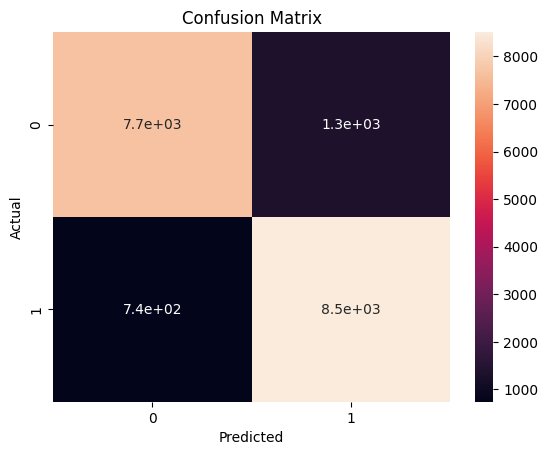

In [404]:
cm(y_pred_lr)


In [405]:
# Classification report
cr(y_pred_lr)

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.85      0.88      9017
           1       0.86      0.92      0.89      9252

    accuracy                           0.89     18269
   macro avg       0.89      0.89      0.89     18269
weighted avg       0.89      0.89      0.89     18269



##2.SVM model

In [406]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

In [407]:
acc_sc(y_pred_svm)

accuracy : 0.9016366522524495


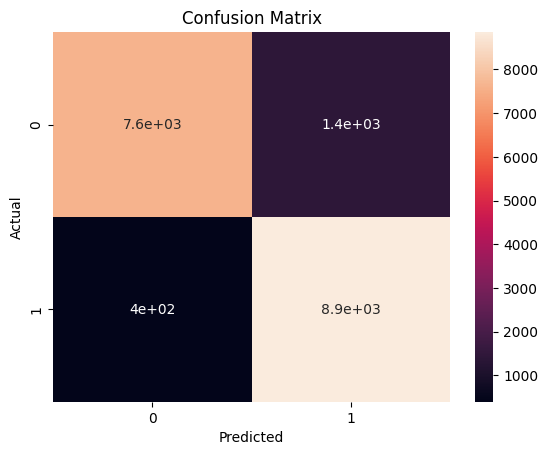

In [408]:
cm(y_pred_svm)

In [409]:
cr(y_pred_svm)

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.84      0.89      9017
           1       0.86      0.96      0.91      9252

    accuracy                           0.90     18269
   macro avg       0.91      0.90      0.90     18269
weighted avg       0.91      0.90      0.90     18269



##3.KNN Model

In [410]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [411]:
acc_sc(y_pred_knn)

accuracy : 0.915375773167661


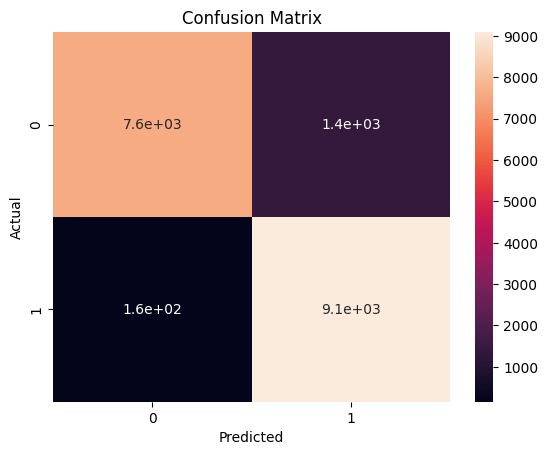

In [412]:
cm(y_pred_knn)

In [413]:
cr(y_pred_knn)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.85      0.91      9017
           1       0.87      0.98      0.92      9252

    accuracy                           0.92     18269
   macro avg       0.92      0.91      0.91     18269
weighted avg       0.92      0.92      0.91     18269



##4.Decision Tree

In [414]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [415]:
acc_sc(y_pred_dt)

accuracy : 0.9250095790683672


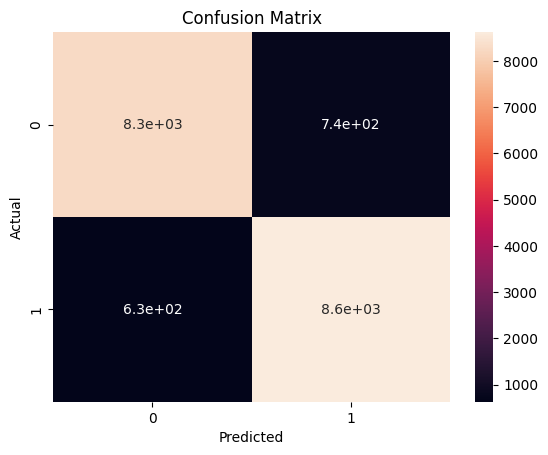

In [416]:
cm(y_pred_dt)

In [417]:
cr(y_pred_dt)

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      9017
           1       0.92      0.93      0.93      9252

    accuracy                           0.93     18269
   macro avg       0.93      0.92      0.92     18269
weighted avg       0.93      0.93      0.93     18269



##Apply Ensemble Learning Methods


## 1.Random Forest

In [418]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier


In [419]:
rf_model = RandomForestClassifier(
    n_estimators=100,    # number of trees
    max_depth=None,       # let trees expand fully
    random_state=42
)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [420]:
acc_sc(y_pred_rf)

accuracy : 0.9517762329629427


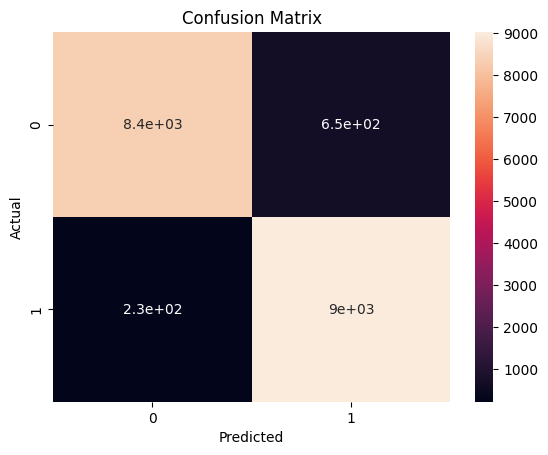

In [421]:
cm(y_pred_rf)

In [422]:
cr(y_pred_rf)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      9017
           1       0.93      0.98      0.95      9252

    accuracy                           0.95     18269
   macro avg       0.95      0.95      0.95     18269
weighted avg       0.95      0.95      0.95     18269



## 2.Bagging

In [423]:
bag_model = BaggingClassifier(
    n_estimators=100,        # number of base learners, uses decision tree by default
    random_state=42
)
bag_model.fit(X_train, y_train)
y_pred_bag = bag_model.predict(X_test)


In [424]:
acc_sc(y_pred_bag)

accuracy : 0.94476982867152


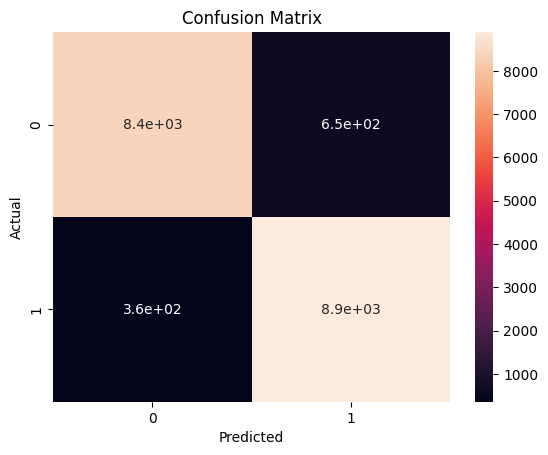

In [425]:
cm(y_pred_bag)

In [426]:
cr(y_pred_bag)

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      9017
           1       0.93      0.96      0.95      9252

    accuracy                           0.94     18269
   macro avg       0.95      0.94      0.94     18269
weighted avg       0.95      0.94      0.94     18269



##3.Ada Boost

In [427]:
ada_model = AdaBoostClassifier(
    n_estimators=100,        # number of weak learners
    learning_rate=0.1,       # step size for each learner
    random_state=4
)
ada_model.fit(X_train, y_train)
y_pred_ada = ada_model.predict(X_test)


In [428]:
acc_sc(y_pred_ada)

accuracy : 0.8728994471509114


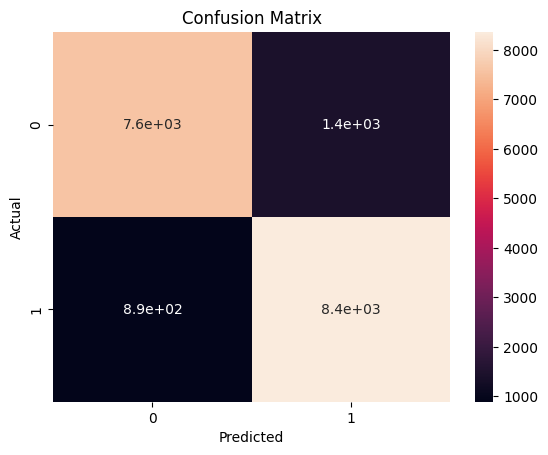

In [429]:
cm(y_pred_ada)

In [430]:
cr(y_pred_ada)

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.84      0.87      9017
           1       0.85      0.90      0.88      9252

    accuracy                           0.87     18269
   macro avg       0.87      0.87      0.87     18269
weighted avg       0.87      0.87      0.87     18269



##4.Gradient Boosting

In [431]:
gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

In [432]:
acc_sc(y_pred_gb)

accuracy : 0.9267611801412229


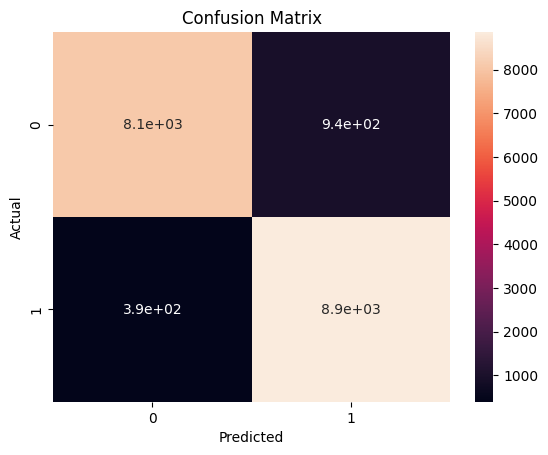

In [433]:
cm(y_pred_gb)

In [434]:
cr(y_pred_gb)

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.92      9017
           1       0.90      0.96      0.93      9252

    accuracy                           0.93     18269
   macro avg       0.93      0.93      0.93     18269
weighted avg       0.93      0.93      0.93     18269




Individual Models Performance Model Accuracy
1. Logistic Regression : 0.88
2. SVM : 0.90
3. KNN : 0.92
4. Decision Tree : 0.92

Observation:

KNN and Decision Tree performed best among individual models.

All models showed good recall for class 1 (subscribers).

Ensemble Models Performance Model Accuracy

1. Random Forest : 0.95
2. Bagging : 0.95
3. AdaBoost : 0.88
4. Gradient Boosting  : 0.93


Observation:

Ensemble models outperform individual models.

Random Forest and Bagging achieved highest accuracy (95%).

AdaBoost performed the lowest among ensemble methods.

##Comparison of performance:
Ensemble models provided higher accuracy and F1-scores.

Random Forest showed best balance of precision and recall.

Ensemble methods reduced overfitting compared to Decision Tree.

##**Best Performing Model**  : Random Forest Classifier
###Reasons:

Highest accuracy (95%)

High precision and recall

Balanced F1-score

Robust and stable

Handles nonlinear relationships effectively

Therefore, Random Forest is selected as the final model.

##Features which influence customer subscription the most.

In [435]:
from sklearn.inspection import permutation_importance
importances = rf_model.feature_importances_                # using random forest model

# Create dataframe
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance.head(10))

           Feature  Importance
1         duration    0.353573
8        euribor3m    0.095414
32   education_enc    0.075880
31         job_enc    0.073455
9      nr.employed    0.069724
0              age    0.053046
5     emp.var.rate    0.051905
2         campaign    0.039653
7    cons.conf.idx    0.031041
6   cons.price.idx    0.025488


Feature Importance
Based on Random Forest feature importance, the most influential feature is **Duration**

The duration of the last contact call is the most influential variable, contributing approximately 35% of the model's predictive power. This indicates that longer call durations are strongly associated with higher subscription probability.

##Business Insights:

Focus on -

1. Call Duration -
Longer call duration strongly increases subscription probability.

2. Previous Responses -
Customers who previously responded positively are more likely to subscribe again.


